### Directed graph : difference between QA and spectral when N vary 

Text(0.5, 0, 'Number of nodes')

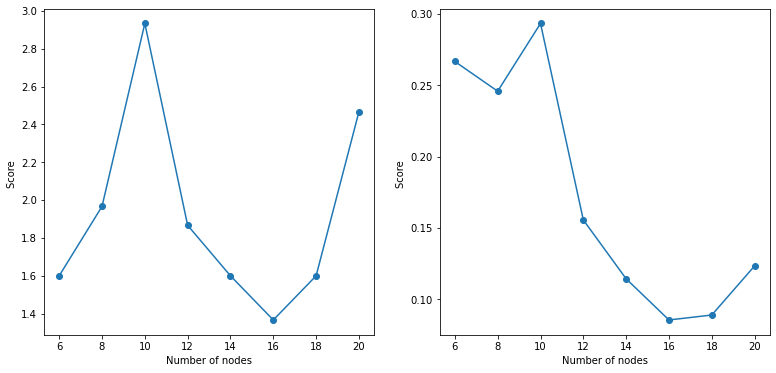

In [35]:
import numpy as np 
import csv
import matplotlib.pyplot as plt

def read_info(namefile):
    ## Read information for QA 
    res_qa=np.array([])
    with open(namefile, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            res_qa=np.append(res_qa,float(row[0]))
    res_qa = np.reshape(res_qa, (res_qa.shape[0],1)) # reshape into a vector mx1
    return(res_qa)

f, (ax11, ax12)= plt.subplots(1, 2,figsize=(13,6)) #create subplots

# Ratio difference
M = 30
ratios_list = []
list_n = [6,8,10,12,14,16,18,20]
for ni in list_n: 
    namefile = "results_bipartite/QuantumValM="+str(M)+"-nodes="+str(ni)+".csv"
    res_qa=read_info(namefile)
    namefile = "results_bipartite/SpectralValM="+str(M)+"-nodes="+str(ni)+".csv"
    res_s=read_info(namefile)
    measure_success = np.mean((res_qa-res_s)/1)
    ratios_list = np.append(ratios_list,measure_success)

ax11.scatter(list_n,ratios_list)
ax11.plot(list_n,ratios_list)
# ax11.set_title("Difference in score of quantum annealing and spectral approach")
ax11.set_ylabel("Score ")
ax11.set_xlabel("Number of nodes")

# ratio relative difference
ratios_list = []
for ni in list_n: 
    namefile = "results_bipartite/QuantumValM="+str(M)+"-nodes="+str(ni)+".csv"
    res_qa=read_info(namefile)
    namefile = "results_bipartite/SpectralValM="+str(M)+"-nodes="+str(ni)+".csv"
    res_s=read_info(namefile)
    measure_success = np.mean((res_qa-res_s)/(ni))
    #print(np.column_stack((res_s,res_qa)))
    ratios_list = np.append(ratios_list,measure_success)

ax12.scatter(list_n,ratios_list)
ax12.plot(list_n,ratios_list)

# ax12.set_title("Difference of score/mean")
ax12.set_ylabel("Score ")
ax12.set_xlabel("Number of nodes")

In [138]:
ni=20
namefile = "results_bipartite/QuantumValM=30-nodes="+str(ni)+".csv"
res_qa=np.around(read_info(namefile),1)
namefile = "results_bipartite/SpectralValM=30-nodes="+str(ni)+".csv"
res_s=np.around(read_info(namefile),1)
# 


### Directed graph : scatter plot N vary 

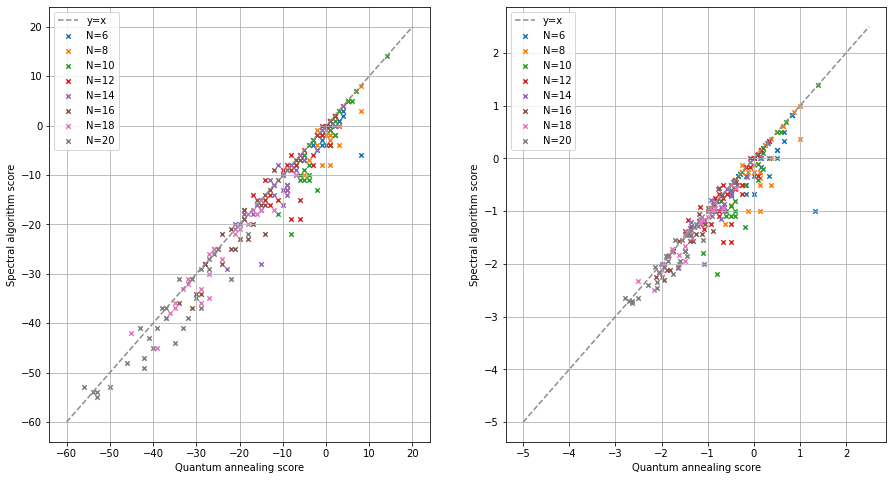

In [36]:
M=30
f, (ax1, ax2)= plt.subplots(1, 2,figsize=(15,8)) #create subplots
ratios_list = []
list_n = [6,8,10,12,14,16,18,20]

for ni in list_n: 
    namefile = "results_bipartite/QuantumValM="+str(M)+"-nodes="+str(ni)+".csv"
    res_qa=read_info(namefile)
    namefile = "results_bipartite/SpectralValM="+str(M)+"-nodes="+str(ni)+".csv"
    res_s=read_info(namefile)
    
    #ax1.xlabel('Scatter plot of maximum cut')
    maxplot = 2
    ## scatter plot needs to be perturbed a bit otherwise, can't see results 
    quantum_scoreplot = res_qa/ ni#+ np.random.rand(M)/2
    spectral_scoreplot = res_s/ni #+ np.random.rand(M)/2
    ax2.scatter(x=quantum_scoreplot, y = spectral_scoreplot,s=20,marker="x",label="N="+str(ni))
    
    ## Plot full scatter plot 
    quantum_scoreplot = res_qa #+ np.random.rand(M)/2
    spectral_scoreplot = res_s #+ np.random.rand(M)/2
    ax1.scatter(x=quantum_scoreplot, y = spectral_scoreplot,s=20,marker="x",label="N="+str(ni))
    
x=np.linspace(-5,2.5,100)
ax2.plot(x,x,"--",label="y=x",c='0.55')
ax2.set_ylabel('Spectral algorithm score')
ax2.set_xlabel('Quantum annealing score')
#ax2.set_title("Relative scores of each algorithm")
# ax2.set_xlim([0, maxplot])
# ax2.set_ylim([0, maxplot])
ax2.legend()
ax2.grid()

maxplot=20
x=np.linspace(-60,20,100)
ax1.plot(x,x,"--",label="y=x",c='0.55')
ax1.set_ylabel('Spectral algorithm score')
ax1.set_xlabel('Quantum annealing score')
#ax1.set_title("Scores of each algorithm")
# ax1.set_xlim([0, maxplot])
# ax1.set_ylim([0, maxplot])
ax1.legend()
ax1.grid()

### Difference between spectral and QA when p varies

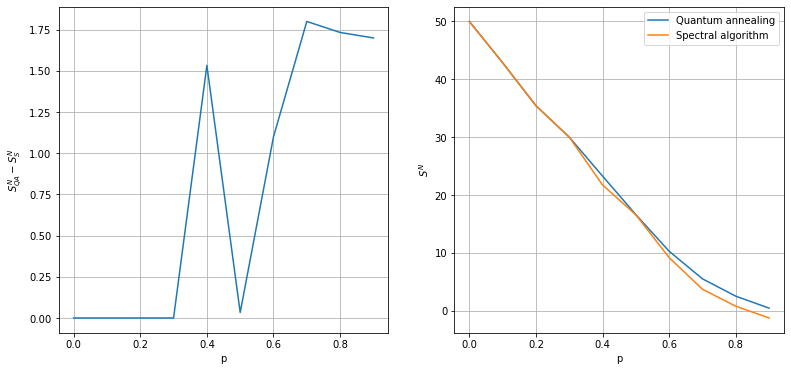

In [119]:

f, (ax1, ax2)= plt.subplots(1, 2,figsize=(13,6)) #create subplots

# Ratio difference
ratios_list = []
plist = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
mean_score_diff = []
mean_qa=[]
mean_s=[]
for pi in plist: 
    namefile = "results_bipartite_p/QuantumValM=30-p="+str(pi)+".csv"
    res_qa=read_info(namefile)
    namefile = "results_bipartite_p/SpectralValM=30-p="+str(pi)+".csv"
    res_s=read_info(namefile)
    diff_score=np.mean(res_qa-res_s)
    mean_score_diff = np.append(mean_score_diff,diff_score)
    mean_qa = np.append(mean_qa,np.mean(res_qa))
    mean_s = np.append(mean_s,np.mean(res_s))

ax1.plot(plist,mean_score_diff)
ax1.set_ylabel('$S_{QA}^N-S_{S}^N$')
ax1.set_xlabel('p')
#ax1.set_title("Difference in score")
ax1.grid()

ax2.plot(plist,mean_qa,label="Quantum annealing")
ax2.plot(plist,mean_s,label = "Spectral algorithm")
ax2.set_ylabel('$S^N$')
ax2.set_xlabel('p')
#ax2.set_title("Mean scores on both algorithm for varying p")
ax2.legend()
ax2.grid()

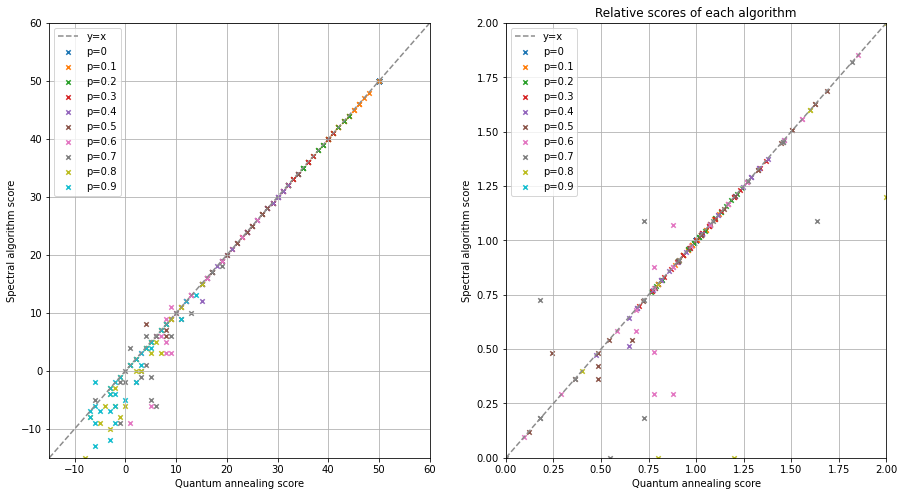

In [126]:
M=30
f, (ax1, ax2)= plt.subplots(1, 2,figsize=(15,8)) #create subplots

for pi in plist: 
    namefile = "results_bipartite_p/QuantumValM=30-p="+str(pi)+".csv"
    res_qa=read_info(namefile)
    namefile = "results_bipartite_p/SpectralValM=30-p="+str(pi)+".csv"
    res_s=read_info(namefile)
    
    #ax1.xlabel('Scatter plot of maximum cut')
    maxplot = 2
    ## scatter plot needs to be perturbed a bit otherwise, can't see results 
    quantum_scoreplot = res_qa/ np.mean(res_qa)#+ np.random.rand(M)/2
    spectral_scoreplot = res_s/np.mean(res_qa) #+ np.random.rand(M)/2
    ax2.scatter(x=quantum_scoreplot, y = spectral_scoreplot,s=20,marker="x",label="p="+str(pi))
    
    ## Plot full scatter plot 
    quantum_scoreplot = res_qa #+ np.random.rand(M)/2
    spectral_scoreplot = res_s #+ np.random.rand(M)/2
    ax1.scatter(x=quantum_scoreplot, y = spectral_scoreplot,s=20,marker="x",label="p="+str(pi))
    
x=np.linspace(0,maxplot,100)
ax2.plot(x,x,"--",label="y=x",c='0.55')
ax2.set_ylabel('Spectral algorithm score')
ax2.set_xlabel('Quantum annealing score')
ax2.set_title("Relative scores of each algorithm")
ax2.set_xlim([0, maxplot])
ax2.set_ylim([0, maxplot])
ax2.legend()
ax2.grid()

minplot = -15
maxplot=60
x=np.linspace(minplot,maxplot,100)
ax1.plot(x,x,"--",label="y=x",c='0.55')
ax1.set_ylabel('Spectral algorithm score')
ax1.set_xlabel('Quantum annealing score')
#ax1.set_title("Scores of each algorithm")
ax1.set_xlim([minplot, maxplot])
ax1.set_ylim([minplot, maxplot])
ax1.legend()
ax1.grid()

### Difference between greedy and QA when Num reads vary

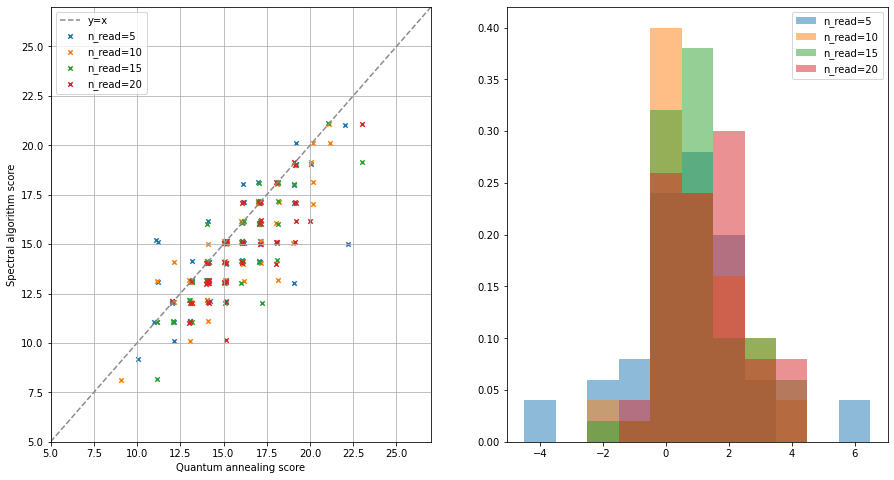

In [115]:
nruns=5
namefile = "results_undirected/QuantumValM=50-nodes=10-numruns="+str(nruns)+".csv"
res_qa=read_info(namefile)
namefile = "results_undirected/GreedyValM=50-nodes=10-numruns="+str(nruns)+".csv"
res_g=read_info(namefile)
M=50
nrunslist = [5,10,15,20]
f, (ax1,ax2)= plt.subplots(1, 2,figsize=(15,8)) #create subplots
for nruns in nrunslist: 
    namefile = "results_undirected/QuantumValM=50-nodes=10-numruns="+str(nruns)+".csv"
    res_qa=read_info(namefile)
    namefile = "results_undirected/GreedyValM=50-nodes=10-numruns="+str(nruns)+".csv"
    res_g=read_info(namefile)
    res_qaplot = res_qa + np.random.rand(len(res_qa),1)/5
    res_gplot = res_g +  np.random.rand(len(res_qa),1)/5

    ## Plot full scatter plot 
    ax1.scatter(x=res_qaplot, y = res_gplot,s=20,marker="x",label="n_read="+str(nruns))
    
    
    # get histograms
    res_diff = res_qa-res_g
    mnres=min(res_diff)
    mxres = max(res_diff)
    bins1 = np.linspace(mnres, mxres, int(mxres-mnres+1)).reshape(1,-1)[0] #set bins to plot an histogram of the values of X^0
    step = bins[1]-bins[0] #adjust the setp 
    hist,bin_edges = np.histogram(res_diff, bins=bins1,density=True) # get the histogram
    hist_norm = hist/(sum(hist)*step) #normalise the histogram
    ax2.bar(bin_edges[:-1], hist_norm, width = step, alpha = 0.5,label="n_read="+str(nruns)) #plot the histogram
    
    
ax2.legend()

maxplot=27
minplot=5
x=np.linspace(minplot,maxplot,100)
ax1.plot(x,x,"--",label="y=x",c='0.55')
ax1.set_ylabel('Spectral algorithm score')
ax1.set_xlabel('Quantum annealing score')
#ax1.set_title("Scores of each algorithm")
ax1.set_xlim([minplot, maxplot])
ax1.set_ylim([minplot, maxplot])
ax1.legend()
ax1.grid()

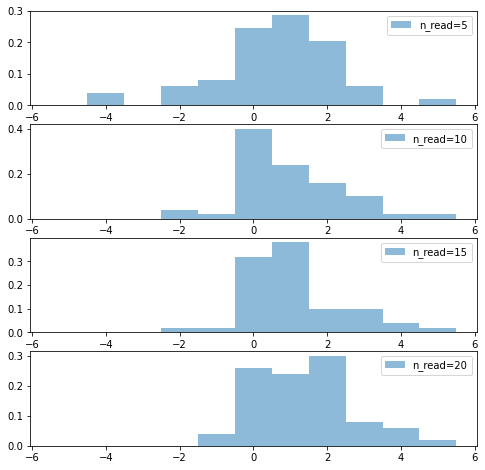

In [137]:
nruns=5
namefile = "results_undirected/QuantumValM=50-nodes=10-numruns="+str(nruns)+".csv"
res_qa=read_info(namefile)
namefile = "results_undirected/GreedyValM=50-nodes=10-numruns="+str(nruns)+".csv"
res_g=read_info(namefile)
M=50
nrunslist = [5,10,15,20]
f, (ax)= plt.subplots(4, 1,figsize=(8,8)) #create subplots

#create the bins 
bins1 = np.linspace(-5, 6, 12).reshape(1,-1)[0] #set bins to plot an histogram of the values of X^0
step = bins[1]-bins[0] #adjust the setp 
    
for i in range(0,len(nrunslist)): 
    nruns = nrunslist[i]
    namefile = "results_undirected/QuantumValM=50-nodes=10-numruns="+str(nruns)+".csv"
    res_qa=read_info(namefile)
    namefile = "results_undirected/GreedyValM=50-nodes=10-numruns="+str(nruns)+".csv"
    res_g=read_info(namefile)
    res_qaplot = res_qa + np.random.rand(len(res_qa),1)/5
    res_gplot = res_g +  np.random.rand(len(res_qa),1)/5

    ## Plot full scatter plot 
#     ax1.scatter(x=res_qaplot, y = res_gplot,s=20,marker="x",label="n_read="+str(nruns))
    
    
    # get histograms
    res_diff = res_qa-res_g
    hist,bin_edges = np.histogram(res_diff, bins=bins1,density=True) # get the histogram
    hist_norm = hist/(sum(hist)*step) #normalise the histogram
    
    ax[i].bar(bin_edges[:-1], hist_norm, width = step, alpha = 0.5,label="n_read="+str(nruns)) #plot the histogram
    ax[i].legend()
    

maxplot=27
minplot=5
x=np.linspace(minplot,maxplot,100)
ax1.plot(x,x,"--",label="y=x",c='0.55')
ax1.set_ylabel('Spectral algorithm score')
ax1.set_xlabel('Quantum annealing score')
#ax1.set_title("Scores of each algorithm")
ax1.set_xlim([minplot, maxplot])
ax1.set_ylim([minplot, maxplot])
ax1.legend()
ax1.grid()

In [134]:
bin_edges[1::]
bins1

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.])